# Figures for Batched Matrix Multiplication Benchmarks

In [6]:
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
from pylab import *
import seaborn as sns
from matplotlib import rc
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sns.set_style('ticks')
import matplotlib.font_manager
for font in matplotlib.font_manager.findSystemFonts(
    '/Users/deepak/Library/Fonts/'):
    matplotlib.font_manager.fontManager.addfont(font)
font = {
    #'font.family':'Roboto',
    'font.weight': 1000,
    'font.size': 12,
}
sns.set_style(font)
paper_rc = {
    'lines.linewidth': 3,
    'lines.markersize': 10,
}
sns.set_context("paper", font_scale=3,  rc=paper_rc)
current_palette = sns.color_palette()

In [7]:
#different output files are in different formats
def read_logfilebmm(logfile_name):
    throughputs = []
    with open(logfile_name, 'r') as f:
        for line in f:
            line = line.strip()
            match = re.match(r'Throughput \(in TFLOP/s\) for (\d+)x(\d+)x(\d+)x(\d+): (\d+\.\d+)', line)
            if match is not None:
                b, m, n, k = int(match.group(1)), int(match.group(2)), int(match.group(3)), int(match.group(4))
                throughput = float(match.group(5))
                throughputs.append({'b': b, 'm': m, 'n': n, 'k': k,
                                    'throughput': throughput})
    return throughputs

def read_logfile_mm_bmm(logfile_name):
    throughputs = []
    with open(logfile_name, 'r') as f:
        for line in f:
            line = line.strip()
            match = re.match(r'Throughput \(in TFLOP/s\) for concat (\d+)x(\d+)x(\d+): (\d+\.\d+)', line)
            if match is not None:
                m, n, k = int(match.group(1)), int(match.group(2)), int(match.group(3))
                throughput = float(match.group(4))
                throughputs.append({'m': m, 'n': n, 'k': k, 'b':0,
                                    'throughput': throughput})
            match = re.match(r'Throughput \(in TFLOP/s\) for (\d+)x(\d+)x(\d+), b=(\d+): (\d+\.\d+)', line)
            if match is not None:
                m, n, k, b = int(match.group(1)), int(match.group(2)), int(match.group(3)), int(match.group(4))
                throughput = float(match.group(5))
                throughputs.append({'b': b, 'm': m, 'n': n, 'k': k,
                                    'throughput': throughput})
    return throughputs


In [8]:
def plot_throughputs(throughputs, label_variable, label_variable_values,
                     xaxis_variable,
                     xlabel, ylabel,
                     yticks,
                     output_filename=None,
                     markevery=1):
    plt.figure(figsize=(10, 4.5))
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)
    for label_variable_value in label_variable_values:
        x_and_y_values = [(x[xaxis_variable], x['throughput'])
                          for x in throughputs if x[label_variable] == label_variable_value]
        ax.plot([value[0] for value in x_and_y_values],
                [value[1] for value in x_and_y_values],
                label=f'{label_variable}={label_variable_value}', marker='o', markevery=markevery)
        
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim(0, None)
    ax.set_yticks(yticks)
    ax.set_xscale('log', base=2)
    plt.legend(frameon=False, ncol=2)    
    sns.despine()
    if output_filename is not None:
        plt.savefig(output_filename, bbox_inches='tight')
    plt.show()

## Throughput of BMMs Varying b

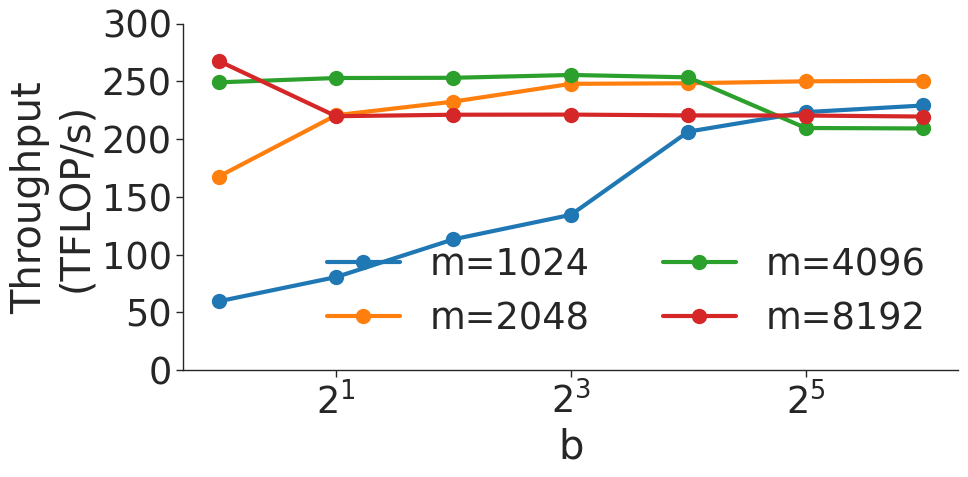

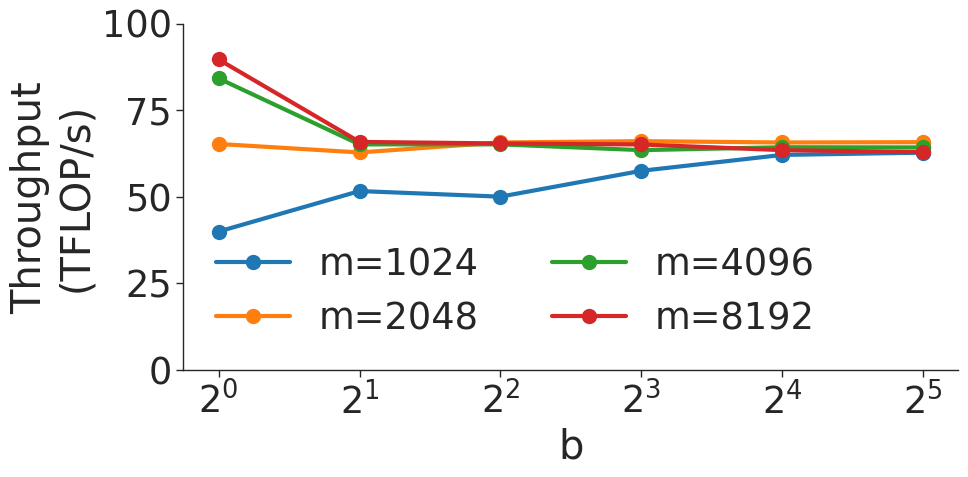

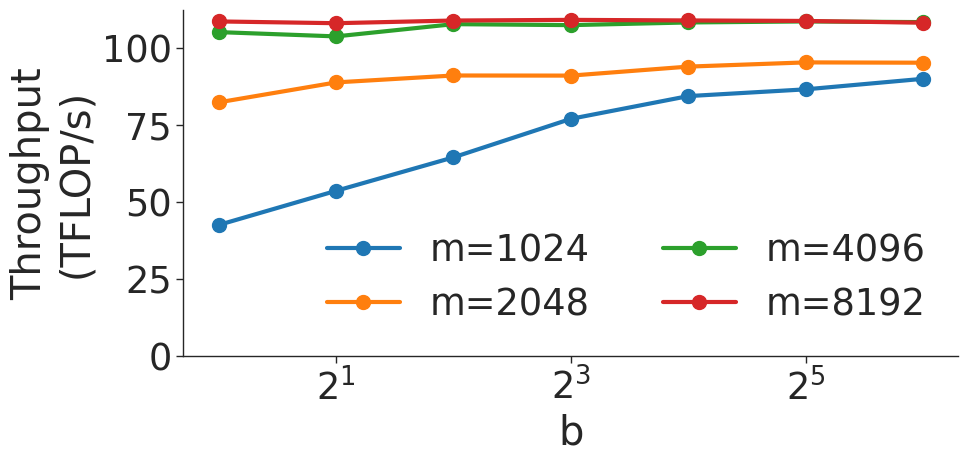

In [13]:
prefix="../results/gemm_data/bmm/bsweep/"
plot_throughputs(read_logfilebmm(f"{prefix}/a100.out"),
                 label_variable='m',
                 label_variable_values=[1024, 2048, 4096, 8192],
                 xaxis_variable='b',
                 xlabel='b',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0, 50, 100, 150, 200, 250, 300])
plot_throughputs(read_logfilebmm(f"{prefix}/v100.out"),
                 label_variable='m',
                 label_variable_values=[1024, 2048, 4096, 8192],
                 xaxis_variable='b',
                 xlabel='b',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0, 25, 50, 75, 100])
plot_throughputs(read_logfilebmm(f"{prefix}/mi250x.out"),
                 label_variable='m',
                 label_variable_values=[1024, 2048, 4096, 8192],
                 xaxis_variable='b',
                 xlabel='b',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0, 25, 50, 75, 100])

## Throughput of BMMs Varying m

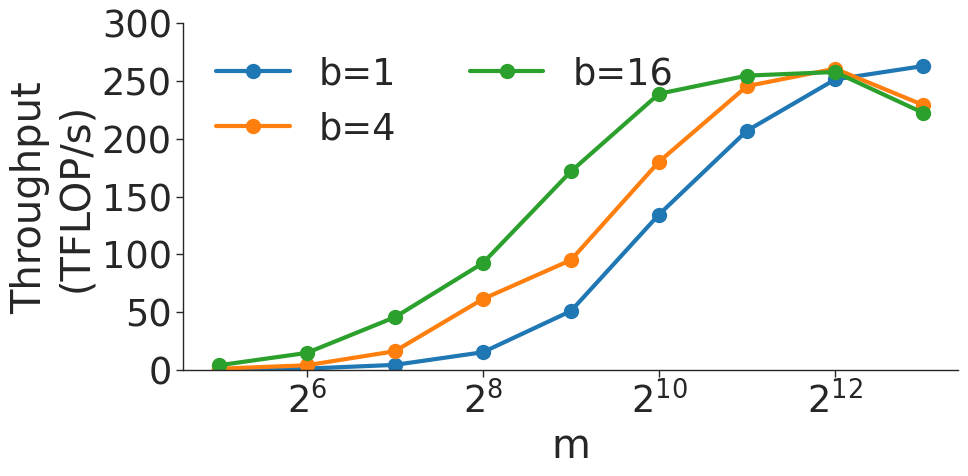

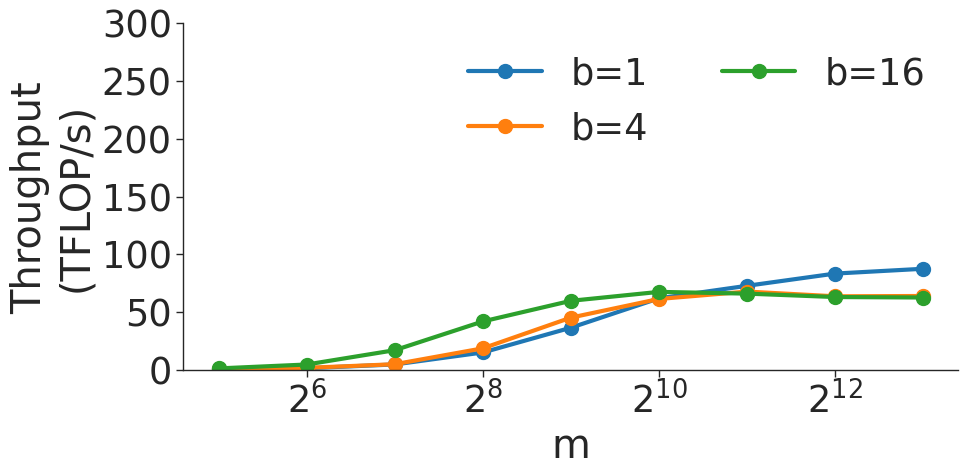

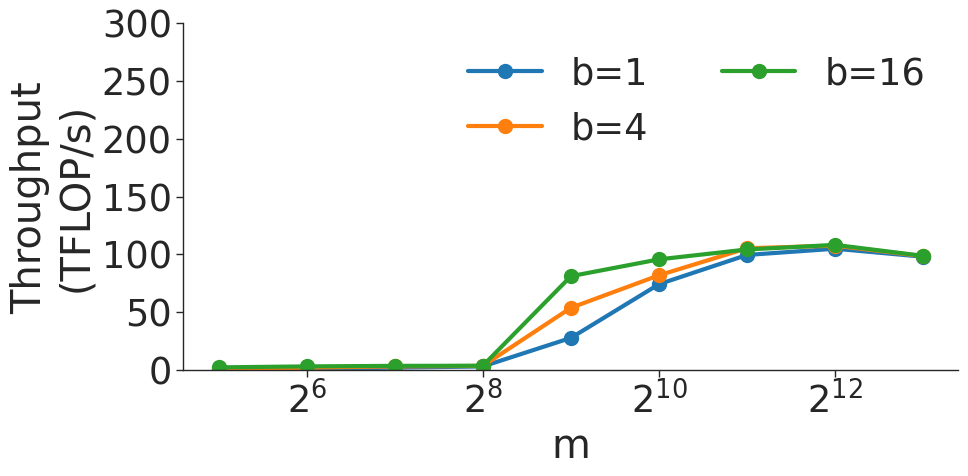

In [10]:
prefix="../results/gemm_data/bmm/msweep/"
plot_throughputs(read_logfilebmm(f"{prefix}/a100.out"),
                 label_variable='b',
                 label_variable_values=[1, 4, 16],
                 xaxis_variable='m',
                 xlabel='m',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0, 50, 100, 150, 200, 250,300])
plot_throughputs(read_logfilebmm(f"{prefix}/v100.out"),
                 label_variable='b',
                 label_variable_values=[1, 4, 16],
                 xaxis_variable='m',
                 xlabel='m',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0, 50, 100, 150, 200, 250,300])
plot_throughputs(read_logfilebmm(f"{prefix}/mi250x.out"),
                 label_variable='b',
                 label_variable_values=[1, 4, 16],
                 xaxis_variable='m',
                 xlabel='m',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0, 50, 100, 150, 200, 250,300])

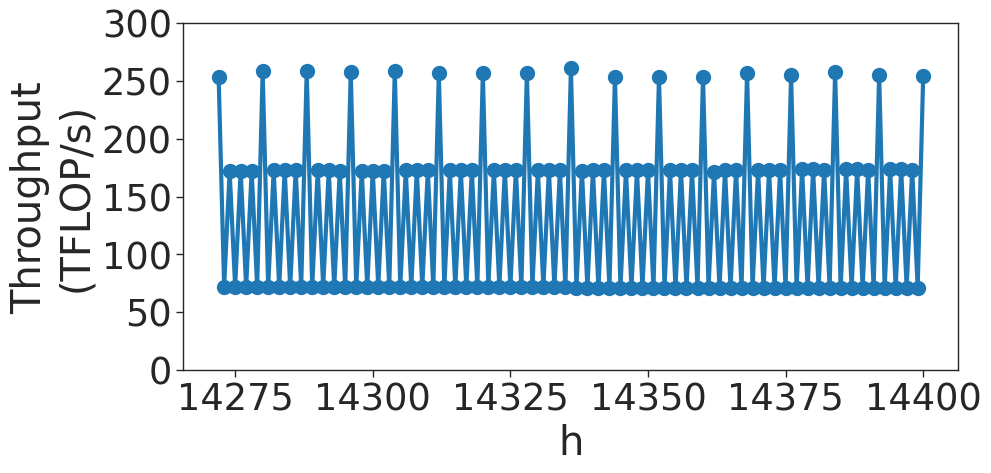

In [11]:
plot_vocab(read_logfile_mm_bmm(f"../results/transformer_data/{arch}/vocab_h_sweep.out"),
                 label_variable='n',
                 label_variable_values=[51200],
                 xaxis_variable='k',
                 xlabel='h',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0,50,100,150,200,250,300])

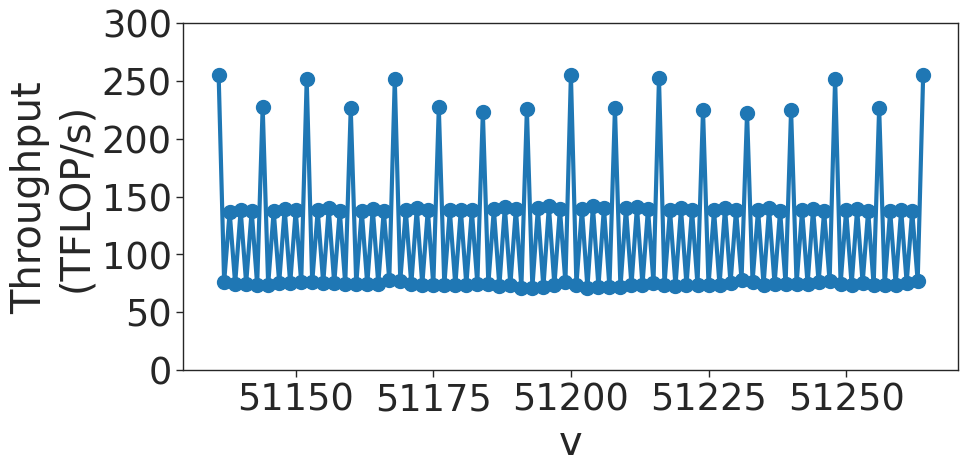

In [12]:
plot_vocab(read_logfile_mm_bmm(f"../results/transformer_data/{arch}/vocab_v_sweep.out"),
                 label_variable='k',
                 label_variable_values=[14336],
                 xaxis_variable='n',
                 xlabel='v',
                 ylabel='Throughput\n(TFLOP/s)',
                 yticks=[0,50,100,150,200,250,300])